<div style="text-align: center; font-family: 'Times New Roman', serif; width: 80%; max-width: 900px; margin: 40px auto; line-height: 1.5;">

<table style="width:100%; border:none; margin-bottom: 20px;">
  <tr>
    <td style="text-align:left;">
      <img src="fcup_logo.png" alt="Logo FCUP" width="120">
    </td>
    <td style="text-align:right; color:gray; font-style:italic;">
      Curso de Ciências de Computadores<br>& Inteligência Artificial e Ciência de Dados
    </td>
  </tr>
</table>

<hr style="margin: 30px 0;">

<p style="font-size:22px; font-style:italic; margin:40px 0 0 0;">
  <b>Trabalho Prático 2</b><br>
  <b>Métodos Numéricos</b>
</p>

<p style="margin-top:50px; font-style:italic;">
  Professora Maria João Rodrigues
</p>

<p style="margin-top:60px; font-size:16px;">
  <b>Elementos do Grupo 8</b><br><br>
  Filipe ZhuHang up202406540<br>
  Jie Chengli up202406887<br>
  Orlando Soares up202303606<br>
  Paulo Lin up202304528
</p>

</div>

# Introdução

Este trabalho foi realizado no âmbito da unidade curricular Análise Numérica, com o
objetivo de apresentar propostas de resolução de exercícios relativos à resolução de
equações não lineares, a partir de métodos iterativos. Os métodos implementados
foram: método das bisseções sucessivas, método iterativo simples e o método de
Newton. Para isso, foi utilizada a linguagem Python.

## Exercício 1
#### *a)* Seja F(x) = sen(x^2)+1.1-e^(-x). Temos o seguinte gráfico:

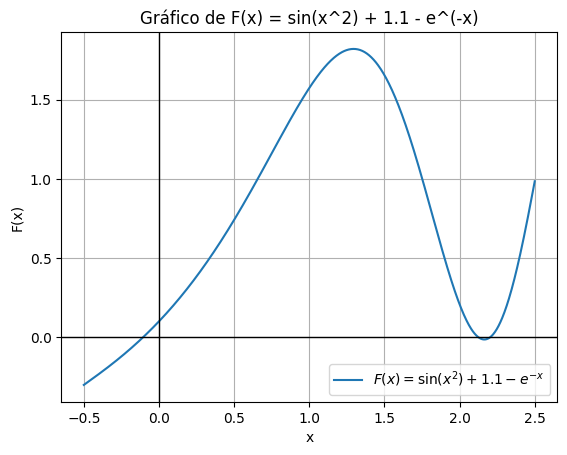

In [1]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Definir a função F(x) = sin(x^2) + 1.1 - e^(-x)
def F(x):
    return np.sin(x**2) + 1.1 - np.exp(-x)

# Definir um intervalo para x
x = np.linspace(-0.5, 2.5, 1000)
y = F(x)

# Plotar o gráfico
plt.plot(x, y, label=r"$F(x) = \sin(x^2) + 1.1 - e^{-x}$")
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title("Gráfico de F(x) = sin(x^2) + 1.1 - e^(-x)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()
plt.show()


Observamos que F(x) interseta o eixo das abcissas (y = 0), nos Intervalos [-0.5, 0] uma vez e [2.0, 2.5] duas vezes.

Como F(x) = sen(x²) + 1.1 − e^(−x) é composta por três termos, analisemos cada um:

* −1 ≤ sen(x²) ≤ 1
* 1.1 é uma constante positiva
* Para x < 0, tem-se −x > 0 ⇒ e^(−x) = e^|x|, que é muito grande, logo o termo −e^(−x) é *muito negativo*.

Assim, quando x → −∞, o termo −e^(−x) domina os restantes e F(x) → −∞.

Mesmo que sen(x²) + 1.1 varie entre 0.1 e 2.1, o contributo de −e^(−x) faz com que F(x) tenda rapidamente para valores negativos muito grandes.

Como F(0) = 0.1 > 0 e F(x) → −∞ para x → −∞, existe apenas uma mudança de sinal à esquerda (logo, no máximo uma raiz).
Depois disso, a função permanece negativa e não volta a cruzar o eixo dos x.

**Logo:**
F(x) tende para −∞, portanto não há mais raízes à esquerda.

Como apenas nos interessa a raíz mais pequena, fazendo zoom na mesma, podemos diminuir o intervalo em que a raíz se encontra (com amplitude de 10^⁻1) para [-0.2, -0.1].

Logo **I = [-0.2, -0.1]**

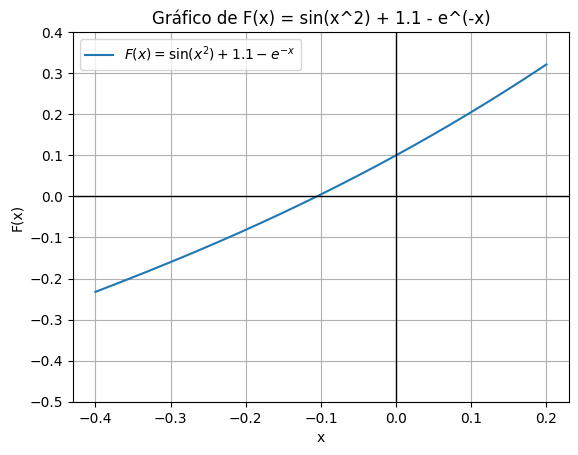

In [2]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Definir a função F(x) = sin(x^2) + 1.1 - e^(-x)
def F(x):
    return np.sin(x**2) + 1.1 - np.exp(-x)

# Definir um intervalo para x
x = np.linspace(-0.4, 0.2, 1000)
y = F(x)

# Plotar o gráfico
plt.plot(x, y, label=r"$F(x) = \sin(x^2) + 1.1 - e^{-x}$")
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)

# Título e rótulos dos eixos
plt.title("Gráfico de F(x) = sin(x^2) + 1.1 - e^(-x)")
plt.xlabel("x")
plt.ylabel("F(x)")

# Ajustar a grade para ter linhas a cada 0.1
plt.xticks(np.arange(-0.4, 0.2, 0.1))  # Ajusta os ticks do eixo x a cada 0.1
plt.yticks(np.arange(-0.5, 0.5, 0.1))    # Ajusta os ticks do eixo y a cada 0.1

# Ativar a grade
plt.grid(True)

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()


#### *b)*
##### *i)* Queremos mostrar que as condições para aplicar tanto o método das bisseções sucessivas como o método de Newton são satisfeitas no Intervalo I. Seja F(x) = f(x).

### Começando pelo método das bisseções sucessivas:

As condições necessárias são:

1. F(x) ser contínua em [a, b]
2. F(a) * F(b) < 0;

Mostra-se que f(x) é contínua em I, visto que tanto sen(x²) como 1.1 - e^(-x) estão definidos em todo o domínio, e como f(x) é a soma dessas duas funções ela também está definida em todo o domínio, incluíndo em I.

Como f(a) ~ -0.0814 e f(b) ~ 0.005, então f(a)*f(b) < 0. Logo ambas as condições verificam-se.


### Para o método de Newton:

As condições necessárias são:
1. F, F' e F'' existem e são contínuas em I;
2. F(a) * F(b) < 0;
3. F'(x) ≠ 0, ∀𝑥 ∈ I;
4. F''(x) ≥ 0 ou F''(x) ≤ 0, ∀𝑥 ∈ I;
5. F(x0) * F''(x0) > 0, x0 ∈ I.

F'(x) = 2x\*cos(x^2)+e^-x e F''(x) = 2\*cos(x^2)-4x^2\*sin(x^2)-e^-x

Como já tinhamos visto, F(x) é contínua em I. Ora, da mesma maneira podemos mostrar que F'(x) e F''(x). Basta reparar que as funções que compõem essas derivadas são também elas contínuas em todo o domínio. Nomeadamente as funções trignométricas sen(x^2) e cos(x^2). E as função e^-x, e 2*x. Como F'(x) e F''(x) são uma combinação linear dessas funções elas também são contínuas em I.

F(a) * F(b) < 0 já foi provado anteriormente.

Como F'(x) > 0, ∀𝑥 ∈ I, a condição 3 verifica-se.


Da mesma forma, como F''(x) > 0, ∀𝑥 ∈ I, a condição 4 verifica-se.

Escolhendo x0 = b = -0.1 como F(-0.1) > 0 e F''(-0.1) > 0 (pela condição 4), temos que F(x0) * F''(x0) > 0. Logo a condição verifica-se.

Como todas as condições se verificam podemos aplicar os métodos anteriormente referidos a F(x) em I.


##### *ii)*

De seguida apresentamos a nossa implementação dos dois métodos referidos anteriormente, que calculam um valor aproximado da raiz para o intervalo I. De notar que no método de Newton x0 = b = -0.1



In [3]:
# Definir a função F(x) = sin(x^2) + 1.1 - e^(-x)
def F(x):
    return np.sin(x**2) + 1.1 - np.exp(-x)

# Derivada de F(x)
def F_prime(x):
    return 2*x * np.cos(x**2) + np.exp(-x)

# Método das Bisseções sucessivas
def bissecao(a, b, tol=1e-9, max_iter=100):
    iteracoes = 0
    while (b - a) / 2 > tol and iteracoes < max_iter:
        c = (a + b) / 2
        if F(a) * F(c) < 0:
            b = c
        else:
            a = c
        iteracoes += 1
    raiz = (a + b) / 2
    return raiz, iteracoes

# Método de Newton
def newton(x0, tol=1e-9, max_iter=100):
    iteracoes = 0
    while iteracoes < max_iter:
        fx = F(x0)
        fpx = F_prime(x0)
        if abs(fx) < tol:
            break
        x0 = x0 - fx / fpx
        iteracoes += 1
    return x0, iteracoes

a, b = -0.2, -0.1  # Intervalo encontrado visualmente no gráfico
x0 = b   #x0 que satisfaz a 5a condição para aplicabilidade do método de Newton
raiz_bissecao, it_bissecao = bissecao(a, b, tol=1e-9)
raiz_newton, it_newton = newton(x0, tol=1e-9)

print(f"Raiz aproximada (Bisseções Sucessivas): {raiz_bissecao}, Iterações: {it_bissecao}")
print(f"Raiz aproximada (Newton): {raiz_newton}, Iterações: {it_newton}")


Raiz aproximada (Bisseções Sucessivas): -0.10534885302186012, Iterações: 26
Raiz aproximada (Newton): -0.10534885324960787, Iterações: 2


## Exercício 2
#### *i)* De seguida implementamos o método iterativo simples para cada uma dos 5 casos:

In [4]:
import math

# Funções g_i(x)
def g1(x):
    return x - x**3 - 4*x**2 + 10

def g2(x):
    if x == 0:
        return float('nan')
    arg = 10/x - 4*x
    return math.sqrt(arg) if arg >= 0 else float('nan')

def g3(x):
    arg = 10 - x**3
    return 0.5 * math.sqrt(arg) if arg >= 0 else float('nan')

def g4(x):
    arg = 10 / (4 + x)
    return math.sqrt(arg) if arg >= 0 else float('nan')

def g5(x):
    denom = 3*x**2 + 8*x
    return (2*x**3 + 4*x**2 + 10)/denom if denom != 0 else float('nan')

# Lista de funções e nomes
gs = [g1, g2, g3, g4, g5]
names = ["g1(x) = x - x³ - 4x² + 10",
         "g2(x) = √(10/x - 4x)",
         "g3(x) = ½√(10 - x³)",
         "g4(x) = √(10/(4 + x))",
         "g5(x) = (2x³ + 4x² + 10)/(3x² + 8x)"]

# Parâmetros
x0 = 1.5
tol = 1e-12
max_iter = 10000

# Iteração simples
for name, g in zip(names, gs):
    x_prev = x0
    converged = False
    for i in range(1, max_iter+1):
        try:
            x_next = g(x_prev)
        except:
            x_next = float('nan')

        if math.isnan(x_next):
            print(f"{name}: falhou (domínio inválido)")
            break

        if abs(x_next - x_prev) < tol:
            converged = True
            print(f"{name}: convergiu em {i} iterações → x ≈ {x_next:.12f}")
            break

        x_prev = x_next

    if not converged and not math.isnan(x_prev):
        print(f"{name}: não convergiu (último valor = {x_prev:.12f})")


g1(x) = x - x³ - 4x² + 10: falhou (domínio inválido)
g1(x) = x - x³ - 4x² + 10: não convergiu (último valor = -2082712908581024997457179183627809033549016221738366759709954481305758017672956495671066147677854017685570863387435107174994275938956662374341691407014825950224181484247938321688218219358704615541966960319844958863360.000000000000)
g2(x) = √(10/x - 4x): falhou (domínio inválido)
g2(x) = √(10/x - 4x): não convergiu (último valor = 2.996908805787)
g3(x) = ½√(10 - x³): convergiu em 41 iterações → x ≈ 1.365230013414
g4(x) = √(10/(4 + x)): convergiu em 14 iterações → x ≈ 1.365230013414
g5(x) = (2x³ + 4x² + 10)/(3x² + 8x): convergiu em 5 iterações → x ≈ 1.365230013414


#### *ii)* Análise do método iterativo simples para cada forma \( g_i(x) \)

A equação em estudo é:


f(x) = x^3 + 4x^2 - 10 = 0


Pretende-se encontrar a raiz real no intervalo [1, 2] através do **método iterativo simples**:

x_(n+1) = g(x_n)

com tolerância |x_(n+1) - x_n| < 10^(-12) e valor inicial ( x0 = 1.5 ).

---

### 🔹 (a) g_1(x) = x - x^3 - 4x^2 + 10

- Esta forma é um **polinómio**, logo **não há restrições de domínio**.
- No entanto, o método **diverge rapidamente**.

g_1'(x) = -3x^2 - 8x + 1

Max| g_1'(x) | > 1

Como g'(x*) > 1, a iteração **afasta-se da raiz** em vez de convergir.  
O valor explode após poucas iterações.

A razão para o output ser "domínio inválido" é por um possível underflow tal que x_next =  `NaN`

**Conclusão:** método diverge (não converge).

---

### 🔹 (b)  g_2(x) = √((10/ x) - 4x)

- A função envolve uma **raiz quadrada**, logo o argumento deve ser **não negativo**: (10/ x) - 4x
- Mas para x = 2, por exemplo, (10/x) - 4x < 0.
- Assim, o método **falha por domínio inválido** (gera `NaN` quando o argumento da raiz fica negativo).

**Conclusão:** método falha devido a **restrição de domínio**.

---

### 🔹 (c) g_3(x) = (1/2)√(10 - x^3)

- Aqui o método **convergiu em 41 iterações**
- A convergência é **muito lenta** max |g_3'(x)| = max| -(3x^2)/(4√(10-x^3)) | ~ 2.121. L é muito grande.

**Conclusão:** método converge para a raíz (1.365230013414), apesar de não satisfazer todas as condições para tal ser garantido (L < 1).

---

### 🔹 (d)  g_4(x) = √(10/(4 + x))

- Aqui o método **convergiu em 14 iterações**
- A convergência é **rápida** visto que max |g_4'(x)| = max| -5/((4+x)^(3/2)√10) | ~ 0.141 <= L < 1 .

**Conclusão:** método converge para a raíz (1.365230013414) rapidamente visto L ser pequeno.


---

### 🔹 (e) g_5(x) = (2x^3 + 4x^2 + 10)/(3x^2 + 8x)

- Aqui o método **convergiu em 5 iterações**
- A convergência é **muito rápida** apesar de  que max|g_5'(x)| ~ 0.357 <= L < 1 ser maior que o L de g_4'(x). Isto pode dever-se ao facto de no intervalo [1, 1.5], (que é onde se encontra a raíz), max|g_5'(x)| ~ 0.115. Logo se x1 tiver nesse intervalo L é de facto muito pequeno o que explicaria essa convergência rápida.

**Conclusão:** método converge para a raíz (1.365230013414) muito rapidamente.

---

## Resumo geral

| Função \(g_i(x)\) | Situação |
|-------------------|-----------|
| g_1(x) = x - x^3 - 4x^2 + 10 | Diverge |
| g_2(x) = √((10/ x) - 4x) | Falha |
| g_3(x) = (1/2)√(10 - x^3) | Converge Lentamente |
| g_4(x) = √(10/(4 + x)) | Converge Rapidamente|
| g_5(x) = (2x^3 + 4x^2 + 10)/(3x^2 + 8x) | Converge Muito Rapidamente |

---

#### *iii)* 
Após a análise dos diferentes casos, g_5 é a melhor forma iterativa para obter a raíz da função f(x) no intervalo [1, 2] com x0 = 1.5. Isto, pois chegou à solução em apenas 5 iterações. Enquanto que g_4 demorou 14 e g_3 demorou 41 iterações. Gostaríamos de realçar que apesar destes resultados para este caso específico. Se x0 fosse diferente mas o intervalo se mantivesse, ou vice-versa. Os resultados poderiam ser diferentes. Isto, pois na teoria, g_4 tinha o menor L (o que resulta numa aproximação mais rápida da raíz) e g_3 nem satisfaz as condições suficientes para convergência, pois tem L > 1.


## Conclusão

Com isto, concluímos que a prática nem sempre corresponde à teoria. Consideramos este trabalho uma aprendizagem importante nesse sentido, para além de nos permitir implementar os métodos dados na aula e ver como funcionam na prática.